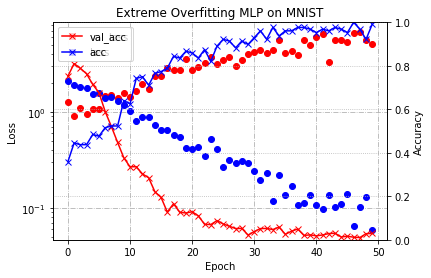

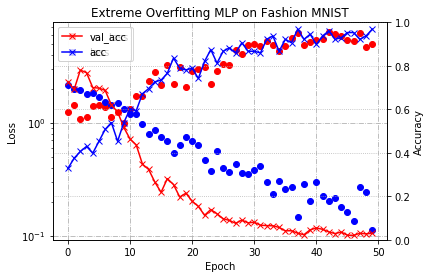

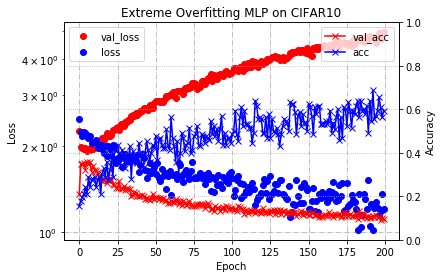

In [79]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
start = 0
end = -1
step = 1
model = 'MLP'
folder = '/raid/data/matlab/sad/'+model+'/'
# folder = ''
datasets = ['MNIST', 'Fashion MNIST', 'CIFAR10']
# files = ['./%s/sig_hist_mnist_corrupted.npz'%model, './%s/sig_hist_fashion_mnist_corrupted.npz'%model, './%s/sig_hist_cifar10_corrupted.npz'%model]
# files = ['./%s/hist_mnist_corrupted.npz'%model, './%s/hist_fashion_mnist_corrupted.npz'%model, './%s/hist_cifar10_corrupted.npz'%model]
# files = ['s_hist_mnist_corrupted_0.npz', 's_hist_fashion_mnist_corrupted_0.npz', 's_hist_fashion_mnist_corrupted_0.npz']
files = ['u_hist_mnist_corrupted_0.npz', 'u_hist_fashion_mnist_corrupted_0.npz', 'u_hist_cifar10_corrupted_0.npz']
# files = ['u_hist_mnist_corrupted_0.npz', 'u_hist_fashion_mnist_corrupted_0.npz', 'u_hist_fashion_mnist_corrupted_0.npz']
for file, dataset in zip(files, datasets):
    data = np.load(folder+file)
    loss_h = data['loss_h']
    loss_val_h = data['loss_val_h']
    acc_h = data['acc_h']
    acc_val_h = data['acc_val_h']
    
    # create the general figure
    fig, ax1 = plt.subplots()

    ax1.semilogy(loss_val_h[start:end:step], 'ro', label = 'val_loss')
    ax1.semilogy(loss_h[start:end:step], 'bo', label = 'loss')
    plt.ylabel("Loss")
    plt.xlabel('Epoch')
    ax1.tick_params(axis='y')
    ax1.grid(linestyle = '-.') 
    ax1.legend(loc=0)
    ax2 = ax1.twinx()

    ax2.plot(acc_val_h[start:end:step], 'rx-', label = 'val_acc')
    ax2.plot(acc_h[start:end:step], 'bx-', label = 'acc')
    ax2.set_ylim(0,1)
    ax2.tick_params(axis='y')
    ax2.grid(linestyle = ':')
    plt.ylabel("Accuracy")

    plt.xlabel('Epoch')
    plt.title('Extreme Overfitting %s on %s'%(model, dataset))
#     plt.legend(lim, ax2.get_label())
    plt.legend()
    plt.savefig('%s.pdf'%dataset)
    plt.show()

In [20]:
# Need to restart kernel each time you change the model :(
import os
import numpy as np
import torch

model_name = 'LeNet'
file = '/raid/data/matlab/sad/'+model_name+'/sfashion_mnist_corrupted_8'

def weight_from_file(file, model_name):
    os.chdir('./'+model_name + '/')
    print(os.getcwd())
    import model_def
    model = model_def.model
    model.load_state_dict(torch.load(file))
    model.eval()
    os.chdir('../')
    weight = 0
#     return 0
    for parameter in model.parameters():
        weight += torch.norm(parameter).item()
    del model
    del model_def
    torch.cuda.empty_cache()
    return weight
    
weight_from_file(file, model_name)

/workspace/sad_points/LeNet


105.91527760028839

In [3]:
os.chdir('../')